In [1]:
from konlpy.tag import Komoran

komoran=Komoran()

/usr/local/lib/python3.6/dist-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [132]:
import pandas as pd
import os
import numpy as np
def RS_POS_tag(x):
    rs=pd.read_csv('/home/u1013/schtm_osy_lsm_kjh/Crawling_Dataset/{}'.format(x),encoding='cp949')
    rs=rs.drop('Unnamed: 0',axis=1)
    rs_text=np.array(rs.loc[:,'Text'].tolist())
    rs_pos_words=[]
    for i in range(len(rs)):
        list=[]
        list+=komoran.pos(rs_text[i])
        rs_pos_words.append(list)
    total_text=[]
    pos_text=[]
    keyword=['부동산정책']
    for j in range(len(rs_pos_words)):
        text_list=rs_pos_words[j]
        for i in range(len(text_list)):
            if text_list[i][1] not in ('SF','SP','SS','SE','SO','SW') and text_list[i][0] not in keyword:
                pos_text.append(text_list[i][:])
        total_text.append(pos_text)
        pos_text=[]
    sub_pos=[]
    selected_pos=[]
    for j in range(len(total_text)):
        pos_list=total_text[j]
        for i in range(len(pos_list)):
            if pos_list[i][1] in ('NNG','NNP'):
                sub_pos.append(pos_list[i][0])
        selected_pos.append(sub_pos)
        sub_pos=[]
    for z in range(len(selected_pos)):
        selected_pos[z]=" ".join(selected_pos[z])
    return selected_pos

In [133]:
tag=RS_POS_tag('MBN뉴스_부동산정책.csv')

In [116]:
tag

['한투 연 방안 실행 민주당 선거 낙선운동 홍 부총리 증세 목적 과세 형평 홍 남 경제 부총리 기획 정부 장관 정부세종청사 국회 기획 재정 위원회 기획 정부 국정 감사 의원 질의 답변 뉴시스 홍 남 경제 부총리 기획 정부 장관 주식 양도 과세 대상 대주주 보유액 기준 방안 개인 투자자 반발 가족 합산 개인 합산 반발 기준 청와대 국민 청원 게시판 게시 홍 남 기재 장관 해임 요청 제목 청원 글 이상 동의 청 원인 대주주 요건 국민 여론 대통령 주식 참여 열의 꺽지 말라 당부 기재 장관 대주주 규정 고수 있다 기관 인과 불평등 과세 기반 개미 투자자 주장 이어 대주주 시행 주식 자금 부동산 시장 유입 부동산 정책 부정 영향 약관 개미 정책 수립 장관 임명 이날 개인 투자자 권익 보호 운동 한국 주식 투자자 연합회 한투 연 해당 방안 더불어민주당 철회 내년 선거 서울 부산 시장 보궐 선거 낙선 운동 정권 심판 운동 경고 한투 연 정의 정 대표 오늘 홍 부총리 강행 발언 대한민국 주식 시장 조종 생각 악법 강행 경우 한투 연 주식 투자자 연대 기재 앞 규모 집회 말 홍 부총리 이날 국회 기획 재정 위원회 국정 감사 해당 사안 2017년 결정 사안 대주주 요건 하향 이 증세 목적 과세 형평 입장 현행 소득세법 시행령 기업 주식 10억 이상 투자자 대주주 주식 매도 때 양도 차익 도세 지방세 포함 내야 다만 주식 보유액 주주 당사자 사실혼 관계 포함 배우자 부모 조부모 외 조부모 자녀 손자 외손자 직계 존 비속 특수 관계자 보유 주식 합산 일각 가족 연좌제 비판 정부 가족 합산 부과 주식 양도소득세 방식 개인 합산 양 다 훈 기자 .com 세계일보 .com 무단 전재 배포 금지',
 '노웅래 민주당 최고위 원새 지도부 출범 달 변화 내년 보선 내후년 대선 대비 태세 당의 자생력 역량 집중 정부 방역 국 부동산 정책 실기 대목 해수 공무원 총격 사건 남북 공동 조사 제의 용해 야 김정은 위원장 사과 입증 문제 목소리 국회 대북 규탄 결의안 채택 최근 이슈 해강 경화 장

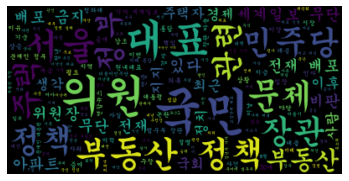

In [117]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = './gungsuh.ttf'

noun_text=''
for i in tag:
    noun_text=noun_text+' '+i
wordcloud=WordCloud(max_font_size=60,relative_scaling=.5,font_path=FONT_PATH).generate(noun_text)
plt.figure()
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [134]:
import pickle

with open('MBN뉴스_부동산정책_Noun_doc.txt','wb') as f:
    pickle.dump(tag,f)

In [135]:
with open('MBN뉴스_부동산정책_Noun_doc.txt','rb') as f:
    read=pickle.load(f)
    print(read)

['6월 7일 오전 청와대 국무회의 김현미 국토 교통부 장관 왼쪽 김상조 청와대 정책실장 대화 사진 매경 DB 청와대 참모진 강남 아파트 논란 역풍 정부 부동산 정책 야권 정책 실패 거론 김현미 국토 교통부 장관 해임 요구 여권 부동산 정책 실패 자성 김 장관 경질 거론 시작 김 장관 문재인 정부 내각 원년 멤버 이자 장수 장관 이낙연 의원 라디오 인터뷰 김 장관 경질 관련 인사 대통령 말 직전 총리 정부 생각 말 이 관련 홍익표 의원 여당 의원 정책 변화 국면 전환 필요 있다 부분 고려 타이밍 언급 미래 통합 당 국민의당 야당 김 장관 해임 촉구 주호영 미래 통합 당 원내대표 정책 실패 민심 공직자 집 처분 해결 문재인 대통령 김현미 장관 해임 국회 해임 건의 행사 엄포 국민의당 안철수 대표 부동산 시장 불안 관련 정책 실패 주범 교체 김현미 국토 교통부 장관 해임 촉구 반면 일부 시점 장관 교체 의견 김 남국 민주당 의원 전쟁 장수 시기 문재인 대통령 인사 스타일 상 자리 관측 실제 문 대통령 김 장관 청와대로 주택 시장 동향 긴급 보고 일각 문책 호출 사실 신임 해석 이미연 기자 .com 매일 경제 .co .kr 무단 전재 배포 금지', '부동산 공급 대책 조세 폭탄 소급 적용 무리 부동산 정책 시민 사이에서 한국 부동산 정책 베네수엘라 판박이 주장 호응 사회주의 주택 정책 망국 길 베네수엘라 한국 정부 부동산 업계 주장 2013년 9월 한 베네수엘라 경제 협력 센터 발행 연구 보고서 자가 주택 소유 기반 보고서 2000년대 베네수엘라 부동산 정책 실패 원인 분석 내용 당시 상황 한국 상황 이 보고서 양국 정책 임대 관련 정책 베네수엘라 정부 9년 임대료 동결 한국 전월 세상 한 유사 정부 기관 임대 감사 국 임대료 여당 추진 표준 임대료 유사 임의 퇴거 금지법 적용 계약 갱신 청구 권제 유사 시행 정부 여당 추진 한국 임대차 정책 방향성 이외 주택 분양 물가지수 반영 금지 양가 상한 건설 주택 국립 기관 허가 매매 분양 전매 제한 분양 관련 정책 유사점